In [49]:
# activate line execution
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# general
import numpy as np
import pandas as pd
import math
# import matplotlib.pyplot as plt
import os
import shutil
import pickle

# plotly
import plotly.express as px  # (version 4.7.0 or higher)
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt

# import custom libraries
import sys
# sys.path.append("C:\\DATA\\Tasks\\lib\\hk")
# import hk_utils

# folder paths
ADD_DATA = "C:\\DATA\\data\\raw\\mimic4\\lookup\\"
ADD_DATA_proc = "C:/DATA/data/processed/"


PATH_PAPER = "C:\\DATA\\Tasks\\220704\\Alternate-Transactions-Articles-LaTeX-template\\images\\"


PATH_SYS="/mlodata1/hokarami/tedam/"

In [50]:
# libraries for THP

import argparse
import numpy as np
import pickle
import time
import torch
import torch.nn as nn
import torch.optim as optim
# from torch.utils.tensorboard import SummaryWriter

import transformer.Constants as Constants
import Utils

# from preprocess.Dataset import get_dataloader, get_dataloader2
# from transformer.Models import Transformer
# from transformer.hk_transformer import Transformer
from tqdm import tqdm

# from torchinfo import summary

os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

# torch.cuda.empty_cache()
# torch.cuda.memory_allocated()
# torch.cuda.memory_reserved()

from sklearn import metrics
# from hk_pytorch import save_checkpoint,load_checkpoint
# import hk_pytorch


# from custom2 import myparser
import re

In [51]:
import Main
import webbrowser


In [52]:
import io

In [53]:
# sudo conda install -c conda-forge dash --name paper2022
# sudo conda install -c conda-forge jupyter-dash --name paper2022

In [54]:
from tsnecuda import TSNE
from MulticoreTSNE import MulticoreTSNE as TSNE

In [55]:
# !pip install wandb -qqq
import wandb
# wandb.login()
api = wandb.Api()
import os

os.environ["WANDB_API_KEY"] = "0f780ac8a470afe6cb7fc474ff3794772c660465"

os.environ["WANDB_NOTEBOOK_NAME"] = "jup_res"

# Functions

In [56]:
import io
import base64
import pickle
import gzip

import numpy as np

from jupyter_dash import JupyterDash
from dash import dcc, html, Input, Output, no_update
import plotly.graph_objects as go

from PIL import ImageDraw, Image

from sklearn.manifold import TSNE

# Helper functions
def np_image_to_base64(im_matrix,scale=4):

    im_matrix = np.repeat(np.repeat(im_matrix,scale,axis=0),scale,axis=1)
    im = Image.fromarray(im_matrix)
    buffer = io.BytesIO()
    im.save(buffer, format="jpeg")
    encoded_image = base64.b64encode(buffer.getvalue()).decode()
    im_url = "data:image/jpeg;base64, " + encoded_image
    return im_url




def binary_matrix_to_image(binary_matrix, grid_size=8, border_size=1):
    # Calculate the size of the output image based on the size of the binary matrix
    height, width = binary_matrix.shape[:2]
    image_width = width * grid_size + (width + 1) * border_size
    image_height = height * grid_size + (height + 1) * border_size
    
    # Create a new image and a draw object to draw the grid and borders
    image = Image.new('RGB', (image_width, image_height), color='black')
    draw = ImageDraw.Draw(image)
    
    # Draw the white grids
    for i in range(height):
        for j in range(width):
            if binary_matrix[i, j] == 1:
                x1 = j * (grid_size + border_size) + border_size
                y1 = i * (grid_size + border_size) + border_size
                x2 = x1 + grid_size
                y2 = y1 + grid_size
                draw.rectangle((x1, y1, x2, y2), fill='white')
    
    # Draw the black borders
    for i in range(height + 1):
        y = i * (grid_size + border_size)
        draw.line((0, y, image_width, y), fill='white', width=border_size)
        
    for j in range(width + 1):
        x = j * (grid_size + border_size)
        draw.line((x, 0, x, image_height), fill='white', width=border_size)
        
    return image

In [57]:
import numpy as np
from PIL import ImageDraw, Image, ImageFont

def binary_matrix_to_image(binary_matrix, row_labels=None, font_path=None, grid_size=10, border_size=1, label_size=15):
    # Add a dummy column to the binary matrix
    ddd=2

    height, width = binary_matrix.shape[:2]
    binary_matrix = np.concatenate((np.zeros((height, ddd)), binary_matrix), axis=1)
    width += ddd
    
    # Calculate the size of the output image based on the size of the binary matrix
    image_width = (width + 1) * grid_size + (width + 2) * border_size
    image_height = height * grid_size + (height + 1) * border_size
    
    # Create a new image and a draw object to draw the grid and borders
    image = Image.new('RGB', (image_width, image_height), color='black')
    draw = ImageDraw.Draw(image)
    
    # Draw the white grids
    for i in range(height):
        for j in range(1, width):
            if binary_matrix[i, j] == 1:
                x1 = j * (grid_size + border_size) + border_size
                y1 = i * (grid_size + border_size) + border_size
                x2 = x1 + grid_size
                y2 = y1 + grid_size
                draw.rectangle((x1, y1, x2, y2), fill='white')
    
    # Draw the black borders
    for i in range(height + 1):
        y = i * (grid_size + border_size)
        draw.line((grid_size, y, image_width, y), fill='white', width=border_size)
        
    for j in range(width + 1):
        x = j * (grid_size + border_size)
        draw.line((x, 0, x, image_height), fill='white', width=border_size)
    
    # Draw the row labels
    if row_labels is not None:
        font = ImageFont.truetype(PATH_SYS+'arial.ttf', size=label_size)
        max_label_width = max([font.getsize(str(label))[0] for label in row_labels])
        label_x = 0
        label_y = border_size
        for i, label in enumerate(row_labels):
            draw.text((label_x, label_y), str(label), font=font, fill='white',align="right")
            label_y += grid_size + border_size
            # if i == 0:
            #     label_x += max_label_width + border_size + grid_size
        
    return image


In [58]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def create_barplot_image(data, labels, filename):
    """
    Creates a bar plot image of the input data and saves it as a PNG file with the given filename.

    Args:
        data (numpy.ndarray): A 1D array of data to plot.
        labels (list): A list of labels for each data point.
        filename (str): The name of the output PNG file.

    Returns:
        PIL.Image.Image: A PIL image object of the bar plot.
    """
    # Create a figure and axis object
    fig, ax = plt.subplots()

    # Create a bar plot
    _ = ax.bar(np.arange(len(data)), data)

    # Set axis labels and title
    _ = ax.set_xlabel('Index')
    _ = ax.set_ylabel('Value')
    _ = ax.set_title('Bar plot')

    # Set x-tick labels
    _ = ax.set_xticks(np.arange(len(data)))
    _ = ax.set_xticklabels(labels, rotation=45)

    # Save the plot as a PNG file
    _ = fig.savefig(filename)
    plt.close(fig)
    # Load the PNG image and return as a PIL image object
    return Image.open(filename)


# Model path

In [59]:
runs_path=[
# "hokarami/TEEDAM_supervised/5uzxzoxd",
"hokarami/TEEDAM_supervised/sb9zf1mm",
"hokarami/TEEDAM_supervised/hue1qxw4",  # seft [Q10-TE__nextmark-concat]1566371 with label

# "hokarami/TEEDAM_supervised/t43m0t0u", # [Q10-DA__base-concat]1563864

"hokarami/TEEDAM_supervised/9gxq3dgy", # [Q10-TEDA__nextmark-concat]1577576 with label

"hokarami/TEEDAM_supervised/56ecgyrq", # [Q20-TEDA__nextmark-concat]1588433
# "hokarami/TEEDAM_supervised/g4x0ibmk", # [Q20-TE__nextmark-concat]1585936 with label

"hokarami/TEEDAM_supervised/lzvf7erg", # [Q20-DA__base-concat]1586915

]

run_path = runs_path[-1]
run_path


run = api.run(run_path)
for file in run.files():
    file.download(replace=True,root='./local/')

'hokarami/TEEDAM_supervised/lzvf7erg'

<_io.TextIOWrapper name='./local/best_model.pkl' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='./local/conda-environment.yaml' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='./local/config.yaml' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='./local/local/[Q20-DA__base-concat]1586915.html' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='./local/opt.pkl' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='./local/output.log' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='./local/requirements.txt' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='./local/wandb-metadata.json' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='./local/wandb-summary.json' mode='r' encoding='UTF-8'>

In [60]:


opt = pickle.load(open('./local/opt.pkl','rb'))
# modify opt
# opt.data=PATH_SYS+'p12-seft/'
opt = Main.config(opt, justLoad=True)

checkpoint = torch.load('./local/best_model.pkl')




model = Main.ATHP(
       n_marks=opt.num_marks,
        TE_config = opt.TE_config,
        DAM_config = opt.DAM_config,
        NOISE_config = opt.NOISE_config,

        CIF_config = opt.CIF_config,
        next_time_config = opt.next_time_config,
        next_type_config = opt.next_type_config,
        label_config = opt.label_config,

        demo_config = opt.demo_config,

        device=opt.device,



    )
model.to(opt.device)
model.load_state_dict(checkpoint['model_state_dict'])
_ = model.eval()


dict_metrics,r_enc_list, out = Main.valid_epoch_tsne(model, opt.validloader, opt.pred_loss_func, opt)



############################## CUDA True
[Info] INPUT DAM --> none-mark-label
[Info] parameters: Namespace(data='/mlodata1/hokarami/tedam/p12-seft/', data_label='multilabel', cuda=1, wandb=True, wandb_project='TEEDAM_supervised', log_freq=1, prof=False, per=100, balanced_batch=True, transfer_learning='', freeze='', ES_pat=100, setting='seft', test_center='', split='', log='log.txt', user_prefix='[Q20-DA__base-concat]', pos_alpha=1.0, epoch=10, batch_size=32, lr=0.01, smooth=0.0, weight_decay=0.1, event_enc=0, time_enc='concat', te_d_mark=8, te_d_time=8, te_d_rnn=256, te_d_inner=16, te_d_k=8, te_d_v=8, te_n_head=4, te_n_layers=4, te_dropout=0.1, state=True, demo=True, num_states=1, noise=False, mod='none', int_dec='sahp', w_event=1.0, next_mark=1, w_class=False, w_pos=False, mark_detach=1, w_time=1.0, sample_label=1, w_pos_label=0.5, w_sample_label=100.0, hparams2write={'data': '/mlodata1/hokarami/tedam/p12/', 'data_label': 'multilabel', 'cuda': 1, 'wandb': True, 'wandb_project': 'TEEDA

ATHP(
  (DAM): DeepAttensionModule(
    (demo_encoder): Predictor(
      (linear1): Linear(in_features=7, out_features=16, bias=True)
      (linear2): Linear(in_features=16, out_features=16, bias=True)
      (linear3): Linear(in_features=16, out_features=40, bias=True)
      (relu): ReLU()
      (do): Dropout(p=0.0, inplace=False)
    )
    (phi): MLP_state(
      (fc1): Linear(in_features=40, out_features=32, bias=True)
      (relu): ReLU()
      (do): Dropout(p=0.0, inplace=False)
      (fc2): Linear(in_features=32, out_features=32, bias=True)
    )
    (attention): CumulativeSetAttentionLayer(
      (psi): MLP_state(
        (fc1): Linear(in_features=40, out_features=16, bias=True)
        (relu): ReLU()
        (do): Dropout(p=0.0, inplace=False)
        (fc2): Linear(in_features=16, out_features=16, bias=True)
      )
      (rho): Linear(in_features=16, out_features=32, bias=True)
    )
    (rho): MLP_state(
      (fc1): Linear(in_features=64, out_features=32, bias=True)
      (re

<All keys matched successfully>

In [61]:
if 'y_state_pred' in out:

    y_state_pred = out['y_state_pred']
    y_state_true = out['y_state_true']
    y_state_score = out['y_state_score']
else:
    y_state_pred = None
    y_state_true = None
    y_state_score = None

y_pred = out['y_pred']
y_true = out['y_true']
y_score = out['y_score']


res=list()


if len(out['state_mod_list'])>0 and 0:

    res_labels = opt.dict_map_states.keys()

    n_cols = len(opt.dict_map_states.keys())

    state_mod_list = out['state_mod_list']
    state_time_list = out['state_time_list']
    len(state_mod_list)
    state_mod_list[0].shape

    for state_mod,state_time in zip(state_mod_list,state_time_list):
        xs = torch.unbind(state_time,0)
        ys = torch.unbind(state_mod,0)

        for x,y in zip(xs,ys):
            # y = y[y~=0]
            n_rows = x.int().max().item() + 1
            matrix = torch.zeros(n_rows, n_cols)
            matrix[x[y!=0].long(), y[y!=0]-1] = 1
            res.append(matrix.cpu().numpy().transpose()) # [n_marks * times]


else:
    non_pad_mask_list = out['non_pad_mask_list']
    event_type_list = out['event_type_list']
    event_time_list = out['event_time_list']

    event_type_list[0].shape
    non_pad_mask_list[0].shape

    num_marks = event_type_list[0].shape[-1]
    res_labels = opt.dict_map_events.keys()



    for event_type, event_time, non_pad_mask in zip(event_type_list,event_time_list,non_pad_mask_list):

        B = event_type.shape[0]
        for i in range(B):
            m = non_pad_mask[i]
            e=event_type[i,:m.sum().int(),:]
            t=event_time[i,:m.sum().int()]
            
            indices = e.nonzero()
            indices[:,0] = t[indices[:,0]]

            M = torch.zeros((indices[:,0].max()+1, e.shape[-1]))
            M[indices[:,0],indices[:,1]]=1


            res.append( M.cpu().numpy().astype(np.uint8).transpose() )


        # temp = torch.unbind(event_type,0)
        # lens = non_pad_mask.sum(1).long()
        # term
        # for i,x in enumerate(temp):
        #     res.append( x[:lens[i],:].cpu().numpy().astype(np.uint8).transpose() )




res[1].shape

len(res_labels)
res_labels




# for i,pattern in enumerate(res):
#     image = Image.fromarray(pattern)


#     # row_labels = opt.dict_map_states.keys()
#     # image = binary_matrix_to_image(pattern, row_labels=row_labels, grid_size=50, border_size=2, label_size=20)
#     # image.save(f'./local/images/img{i}.jpeg')
all_images = [f'./local/images/img{i}.jpeg' for i in range(len(res))]

torch.Size([32, 43, 24])

torch.Size([32, 43])

(24, 39)

24

dict_keys(['BUN', 'Creatinine', 'Glucose', 'HCO3', 'Na', 'K', 'Mg', 'HCT', 'Platelets', 'WBC', 'FiO2', 'PaCO2', 'PaO2', 'pH', 'SaO2', 'ALP', 'ALT', 'AST', 'Albumin', 'Bilirubin', 'Lactate', 'Cholesterol', 'TroponinI', 'TroponinT'])

# Visualizations

## TSNE of Learned Rep

In [62]:
TSNE_LIMIT = 6000

tsne = TSNE(n_components=2, perplexity=30, learning_rate=10,n_jobs=4)

X = np.concatenate(r_enc_list,axis=0)[:,:]
X_tsne = tsne.fit_transform(X[:TSNE_LIMIT,:])

if model.d_out_te>0:
    X_te = np.concatenate(r_enc_list,axis=0)[:,:model.d_out_te]
    X_te_tsne = tsne.fit_transform(X_te[:TSNE_LIMIT,:])

if model.d_out_dam>0:    
    X_dam = np.concatenate(r_enc_list,axis=0)[:,model.d_out_te:]
    X_dam_tsne = tsne.fit_transform(X_dam[:TSNE_LIMIT,:])


## build df

In [63]:
df = pd.DataFrame()
df['x']=X_tsne[:,0]
df['y']=X_tsne[:,1]

# df['x']=X_te_tsne[:,0]
# df['y']=X_te_tsne[:,1]

# df['x']=X_dam_tsne[:,0]
# df['y']=X_dam_tsne[:,1]

df['color']=0
df['id']=np.arange(len(df))


if y_state_true is not None:

    TP = (y_state_true[:TSNE_LIMIT]*y_state_pred[:TSNE_LIMIT])==1
    FP_FN = (y_state_true[:TSNE_LIMIT]+y_state_pred[:TSNE_LIMIT])==1
    FN = (y_state_true[:TSNE_LIMIT]-y_state_pred[:TSNE_LIMIT])==1
    FP = (y_state_true[:TSNE_LIMIT]-y_state_pred[:TSNE_LIMIT])==-1

    TN = (y_state_true[:TSNE_LIMIT]+y_state_pred[:TSNE_LIMIT])==0



    # df.loc[TN, 'color']='True Negatives'
    df.loc[TP, 'color']='True Positives'
    df.loc[FN, 'color']='False Negatives'
    df.loc[FP, 'color']='False Positives'
    df.loc[TN, 'color']='True Negatives'

    df.loc[y_state_true[:TSNE_LIMIT].astype(bool).flatten(), 'color_true']='Positive Samples'
    df.loc[~y_state_true[:TSNE_LIMIT].astype(bool).flatten(), 'color_true']='Negative Samples'


    df.loc[y_state_pred[:TSNE_LIMIT].astype(bool).flatten(), 'color_pred']='Positive Predicted'
    df.loc[~y_state_pred[:TSNE_LIMIT].astype(bool).flatten(), 'color_pred']='Negative Predicted'

df

,x,y,color,id,color_true,color_pred
0,-20.260752,-25.630825,True Negatives,0,Negative Samples,Negative Predicted
1,-18.671772,-4.015034,True Negatives,1,Negative Samples,Negative Predicted
2,32.330433,-3.583918,True Negatives,2,Negative Samples,Negative Predicted
3,-27.577314,1.355734,True Negatives,3,Negative Samples,Negative Predicted
4,-37.135117,7.876999,True Negatives,4,Negative Samples,Negative Predicted
...,...,...,...,...,...,...
1883,-26.649498,13.021449,False Positives,1883,Negative Samples,Positive Predicted
1884,15.190439,-24.976955,True Negatives,1884,Negative Samples,Negative Predicted
1885,-25.113386,6.462173,True Negatives,1885,Negative Samples,Negative Predicted
1886,15.706372,11.239589,True Negatives,1886,Negative Samples,Negative Predicted


## plot Figure

In [64]:
color_map = {
    'Positive Samples': "#E52B50",
    'Negative Samples': "#3B7A57",
    0: "#3B7A57",
    'Positive Predicted': "#3DDC84",
    'Negative Predicted': "#FFBF00",
    5: "#915C83",
    'True Positives': "#008000",
    'False Negatives': "#7FFFD4",
    'False Positives': "#E9D66B",
    'True Negatives': "#007FFF",
}


labels = df['color_true'].values
colors = [color_map[label] for i,label in enumerate(labels)]

fig = go.Figure(data=[go.Scatter(
    x=df['x'],
    y=df['y'],
    # z=tsne[:, 2],
    mode='markers',
    marker=dict(
        # size=2,
        color=colors,
    )
)])

_=fig.update_layout(
    # autosize=False,
    title=run.name,
    width=1000,
    height=1000,

)
_=fig.update_traces(
    hoverinfo="none",
    hovertemplate=None,
)
# _=fig.update_layout(
#     scene=dict(
#         xaxis=dict(range=[-10,10]),
#         yaxis=dict(range=[-10,10]),
#         # zaxis=dict(range=[-10,10]),   
#     )
# )





# save to run
fig.write_html(f"local/{run.name}.html")
run.upload_file(f"local/{run.name}.html")


# tsne of TE_nextmark[label]
    # https://storage.googleapis.com/wandb-production.appspot.com/hokarami/TEEDAM_supervised/hue1qxw4/local/temp.html?Expires=1676986614&GoogleAccessId=wandb-production%40appspot.gserviceaccount.com&Signature=xLOuNCu8qoWVwFRPCspoPKTFbpF5aOSJMAFICqsDRYxf2wfudxEiFFEIlXBIq9YyYZcPtpSKSzYb6nUr0lloLZ6GHg1w4AOBZyieBKBsuKmIDGqhRY4ojK0FPHZHD%2BeoKERgjD42F19vP8E5Qf%2BA7PlgB2E%2BWutwJxx1sc2TtCgjUdkEK%2BEwaTzfQBQ0hXGIWC9MeirU7hRSmn4%2BXzIRaRcUFjF0vOtxCHBjsEhldGSwaUFv21kt4qvr2hSeR5Ku5gS7webtvzVi6fw55Muq78%2FB90r3EqWqy9Sn68T%2FDKx%2F%2FzHVfge4TsxlIjRE%2F9HBCo7qZeNeeHnlHjVZXdvTKg%3D%3D

# tsne of DA[label]
    # https://storage.googleapis.com/wandb-production.appspot.com/hokarami/TEEDAM_supervised/t43m0t0u/local/temp.html?Expires=1676987035&GoogleAccessId=wandb-production%40appspot.gserviceaccount.com&Signature=jX44t4Nblmtzd0CCZC2Gn0cw43iZZbZtuofN%2BrlmzgennSxNz36YE4BwYU%2Ft21iuFdSwmqPLnnI%2B2saLWT9kZsBHNo0e2Nsti0vhf7216iT1wsnnFukn%2B8CswPFeQUQBmSyvEO0IJRTE%2BLmjORdY5NFMdgeXchVwLlf8LBIJFoxAfyiaYLmCNcjWwSmbkvVf1DwOxL2sjneA8TtkgQiSCZiC3GgMJBfh8wg1bf6wS%2Bxa95APq%2BPo6J7%2Ffq0sqmqCiAp28E309PlM29C0C89y63dvzqkRhBhvdffx3O%2FFUAmK%2FjRF82ohd7JSgxMva9oWz%2By7aHESGKr0b49KrUxM2Q%3D%3D



<File local/[Q20-DA__base-concat]1586915.html (text/html; charset=utf-8) 3.6MiB>

## Dash

In [65]:
app = JupyterDash(__name__)

app.layout = html.Div(
    className="container",
    children=[
        html.Div(id="dummy2"),
        html.Div(id="dummy"),

        dcc.Graph(id="graph-5", figure=fig, clear_on_unhover=True,),
        dcc.Tooltip(id="graph-tooltip-5", direction='bottom'),
       
    ],

)

@app.callback(
    Output("graph-tooltip-5", "show"),
    Output("graph-tooltip-5", "bbox"),
    Output("graph-tooltip-5", "children"),
    Output("dummy2", "children"),
    Input("graph-5", "hoverData"),
)
def display_hover(hoverData):
    if hoverData is None:
        return False, no_update, no_update

    num = 111111
    # demo only shows the first point, but other points may also be available
    hover_data = hoverData["points"][0]
    bbox = hover_data["bbox"]
    num = hover_data["pointNumber"]

    output_str = f"{num}"

    im_matrix = res[num].astype(int)
    # im_url = np_image_to_base64(im_matrix)
    # im_url = binary_matrix_to_image(im_matrix)
    im_url = binary_matrix_to_image(im_matrix, row_labels=res_labels, grid_size=50, border_size=2, label_size=20)
    
    vector = im_matrix.sum(1)/im_matrix.shape[1]*24
    # im_url = plot_bar_chart(vector, labels=res_labels)
    im_url = create_barplot_image(vector, res_labels, './local/images/temp.png')
    
    # binary_matrix = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]])
    # row_labels = ['A', 'B', 'C']
    # im_url = binary_matrix_to_image(binary_matrix, row_labels=row_labels, grid_size=50, border_size=2, label_size=20)
    


    children = [
        html.Div([
            html.Img(
                src=im_url,
                style={"height": "400px", 'display': 'block', 'margin': '0 auto'},
            ),
            # html.P("MNIST Digit " + str(labels[num]), style={'font-weight': 'bold'})
            html.P(f"Patterns-id={num}" , style={'font-weight': 'bold'})

        ])
        
    ]

    return True, bbox, children, output_str




# Define a callback function to print the selected point IDs
@app.callback(Output("dummy", "children"), [Input("graph-5", "selectedData")])
def display_selected_data(selected_data):
    if selected_data is None:
        return "No points selected."
    else:
        point_ids = [point["pointIndex"] for point in selected_data["points"]]

        # print(f"{point_ids},\n")
        return f"{point_ids},\n"

if __name__ == "__main__":
    # app.run_server(mode='inline', debug=True)
    app.run_server(mode='external',port=np.random.randint(2000,5000))

Dash app running on http://127.0.0.1:4887/


# plot subset

## patterns

/tmp/ipykernel_14927/1958328075.py:42: DeprecationWarning:

getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.



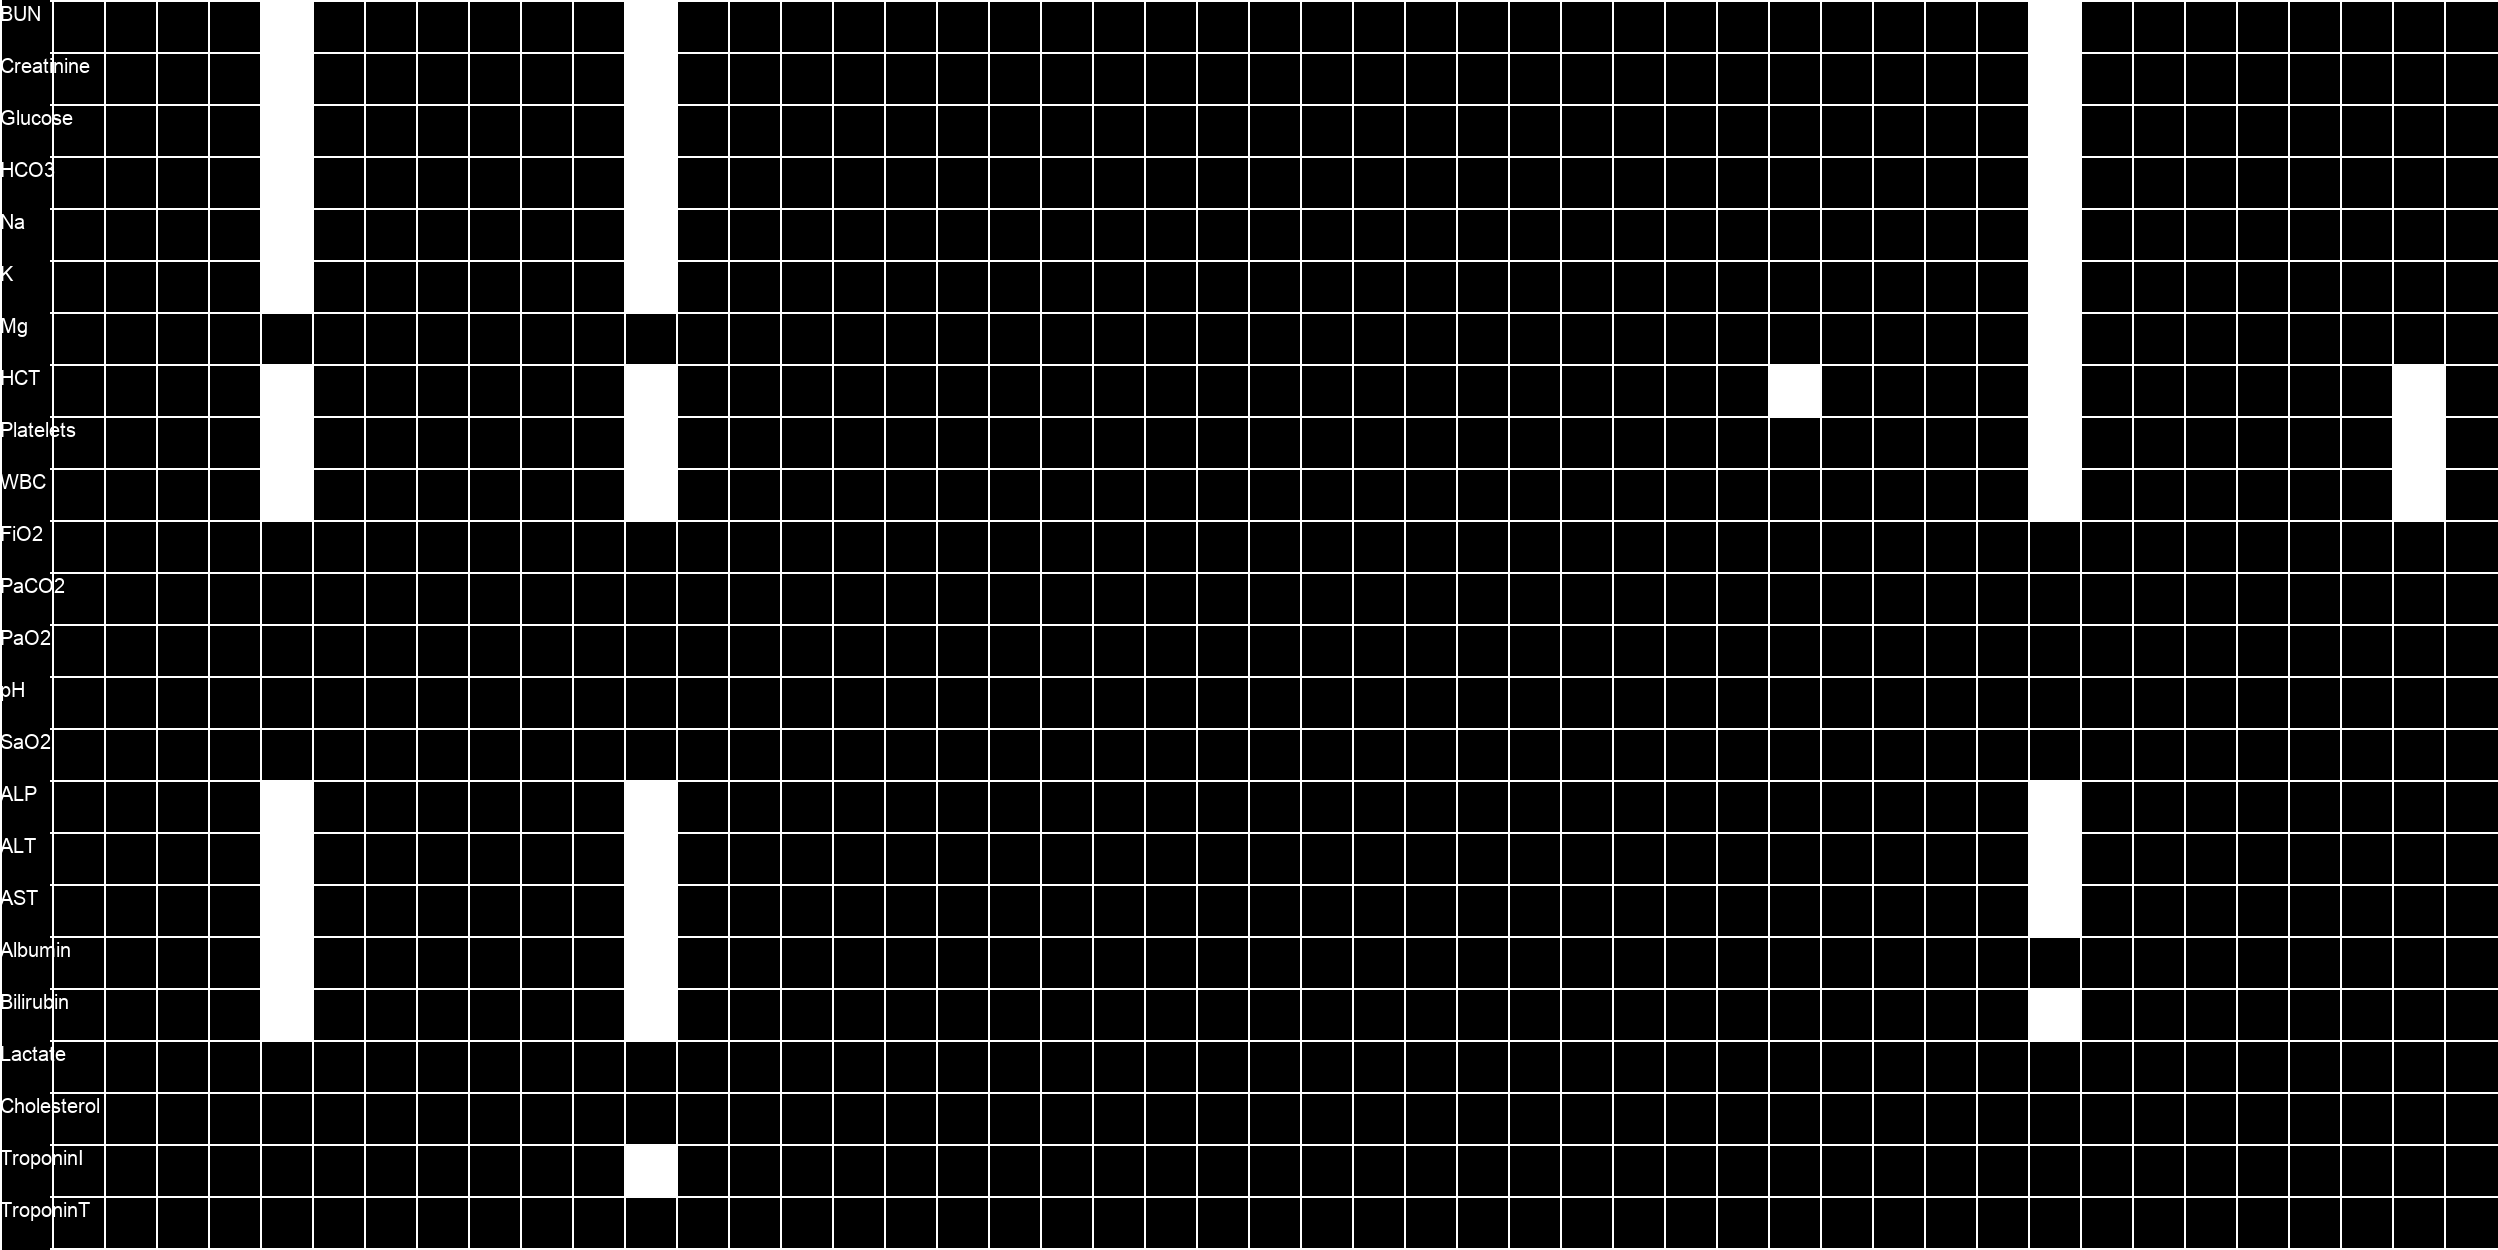

: 

In [68]:


iii=[1836]

for ii in iii:
    im_matrix = res[ii]
    row_labels = opt.dict_map_states.keys()
    im_url = binary_matrix_to_image(im_matrix, row_labels=res_labels, grid_size=50, border_size=2, label_size=20)
    im_url.save(f'./local/images/img{ii}.jpeg')
    im_url



## summary

In [67]:

clusters = [

[1836, 48, 1879, 287, 1528, 509, 72, 978, 274, 1296],

[1836, 1506, 138, 516, 497, 981, 573, 1129, 90, 1693],



]




fig2 = go.Figure()
for i_c, cluster in enumerate(clusters):
    list_summary = []
    for i in cluster:
        vector = res[i].sum(1)/res[i].shape[1]*24
        list_summary.append(vector)

    vec_mean = np.mean(list_summary,axis=0)
    vec_std = np.std(list_summary,axis=0)


    
    _ = fig2.add_trace(go.Bar(
        name=f'Cluster {i_c}',
        x=list(res_labels), y=vec_mean,
        error_y=dict(type='data', array=vec_std)
    ))

fig2.show()

## K nearest

In [66]:
id_origin = 1836            # 1836 792 1718 1532
n_knn = 10


x0 = df.iloc[id_origin]['x']
y0 = df.iloc[id_origin]['y']
x0
y0


df['r'] = df.apply(lambda row: ( (row['x']-x0)**2 + (row['y']-y0)**2  ), axis=1)

# df.nsmallest(n_knn,'r')

list(df.nsmallest(n_knn,'r').index)

-8.410063

19.656166

[1836, 1506, 138, 516, 497, 981, 573, 1129, 90, 1693]